In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Construct the chain graph

In [3]:
chain = nx.Graph()
for i in range(30):
    if i == 0:
        continue
    chain.add_weighted_edges_from([(i-1, i, 1)])

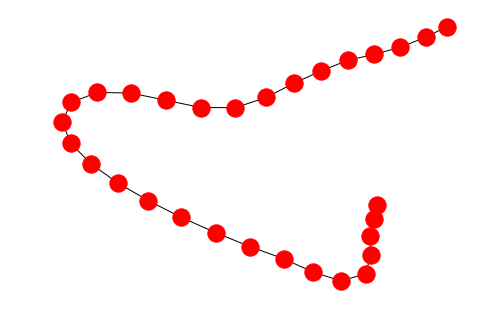

In [4]:
nx.draw(chain)
plt.draw()

### Compute adjacency matrix, degree matrix, lapacian matrix and its eigenvectors

In [44]:
chain_A = nx.to_numpy_array(chain)

chain_D = np.zeros(np.shape(chain_A))
for i in range(len(chain_A)):
    chain_D[i][i] = np.sum(chain_A[i])

chain_L = chain_D - chain_A
chain_w, chain_v = np.linalg.eig(chain_L)

In [47]:
np.shape(chain_v[:20])
Image.fromarray(chain_v[:20])

(20, 30)

### Create a lattice graph

In [30]:
lattice = nx.grid_graph([30, 30])

lattice_A = nx.to_numpy_array(lattice)

lattice_D = np.zeros(np.shape(lattice_A))

for i in range(len(lattice_A)):
    lattice_D[i][i] = np.sum(lattice_A[i])

lattice_L = lattice_D - lattice_A

lattice_w, lattice_v = np.linalg.eig(lattice_L)

In [51]:
np.shape(lattice_v[:20])

(20, 900)

### Reconstruct image using eigenvectors

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

#### Load image and resize

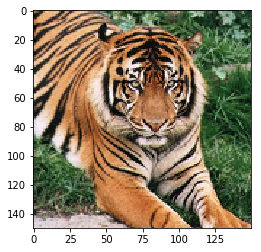

In [43]:
image = Image.open('tiger.jpg')
image.thumbnail((150, 150), Image.ANTIALIAS)
plt.imshow(image)

In [40]:
image = np.array(image)
print(np.shape(image))

(150, 150, 3)


In [33]:
np.shape(lattice_v[:30])

(30, 900)

In [58]:
# d x k, d: num of pixels in image, k: num of eigenvectors
E = lattice_v[:30]
r = E*1 + image
print(np.shape(r))

(30, 900)
